### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [41]:
import pandas as pd
raw_data = pd.read_csv(r'C:\Users\asus\Desktop\github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

In [42]:
df=raw_data
print(f"去重前数据量:{len(df)}")
df=df.drop_duplicates()
print(f"去重后数据量:{len(df)}")

去重前数据量:20358
去重后数据量:19779


In [43]:
df=df.drop(columns=['gravatar_id'])
missing_values = df.isnull().sum()
print(missing_values)

actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [44]:

boolean_columns = ['site_admin','hireable']
for i in boolean_columns:
    df[i]=df[i].astype(bool)
txt_colums=['actor_id','label','login','id','node_id','type','name','company','blog','location','email','bio','twitter_username','public_repos','public_gists','followers','following','created_at','updated_at']
for i in txt_colums:
    df[i]=df[i].fillna('')
missing_values_count=df.isnull().sum()
print(missing_values_count)

actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


In [45]:
from datetime import datetime

# 转换为时间戳
df['created_at'] = pd.to_datetime(df['created_at']).map(datetime.timestamp)
df['updated_at'] = pd.to_datetime(df['updated_at']).map(datetime.timestamp)

label
Human    18588
Bot       1191
Name: count, dtype: int64


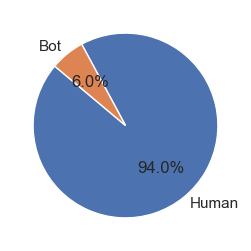

In [51]:
import matplotlib.pyplot as plt
account=df['label'].value_counts()
print(account)
plt.figure(figsize=(4,3))
plt.pie(account,labels=account.index,autopct='%1.1f%%',startangle=140)
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_37568\4066470702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_df['created_at_date'] = pd.to_datetime(bot_df['created_at'], unit='s')


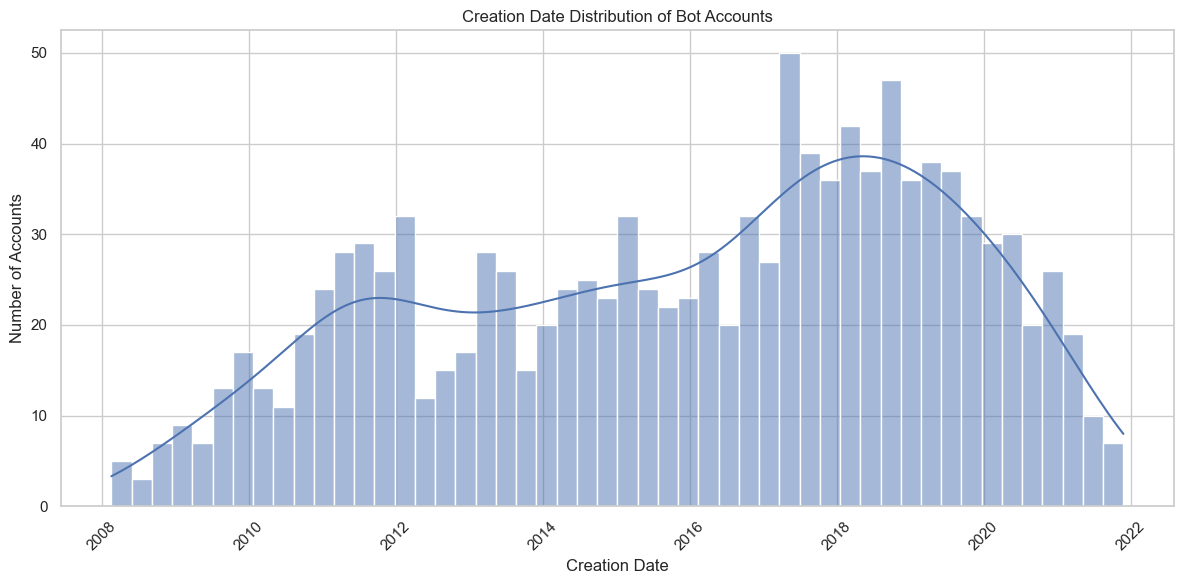

In [56]:
import seaborn as sns
# 过滤出bot类型的账号
bot_df = df[df['label'] == 'Bot']

# 将时间戳转换回日期时间格式，以便于可视化
bot_df['created_at_date'] = pd.to_datetime(bot_df['created_at'], unit='s')

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制bot账号创建时间的分布图
plt.figure(figsize=(12, 6))
sns.histplot(data=bot_df, x='created_at_date', bins=50, kde=True)
plt.title('Creation Date Distribution of Bot Accounts')
plt.xlabel('Creation Date')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_37568\2171409600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['created_at_date'] = pd.to_datetime(human_df['created_at'], unit='s')


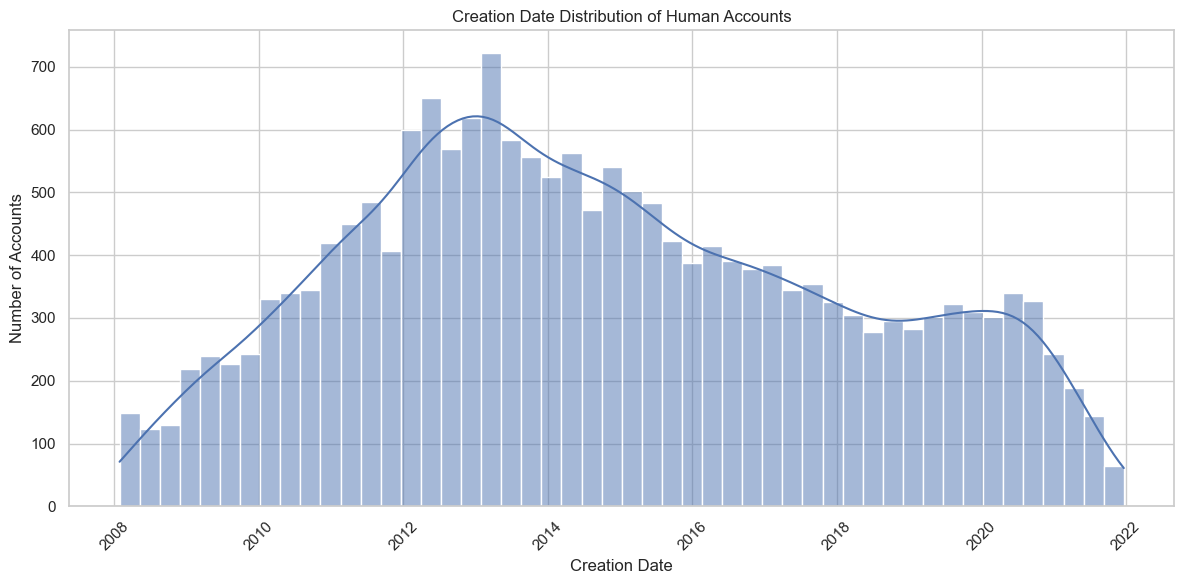

In [57]:
# 过滤出human类型的账号
human_df = df[df['label'] == 'Human']

# 将时间戳转换回日期时间格式
human_df['created_at_date'] = pd.to_datetime(human_df['created_at'], unit='s')

# 绘制human账号创建时间的分布图
plt.figure(figsize=(12, 6))
sns.histplot(data=human_df, x='created_at_date', bins=50, kde=True)
plt.title('Creation Date Distribution of Human Accounts')
plt.xlabel('Creation Date')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

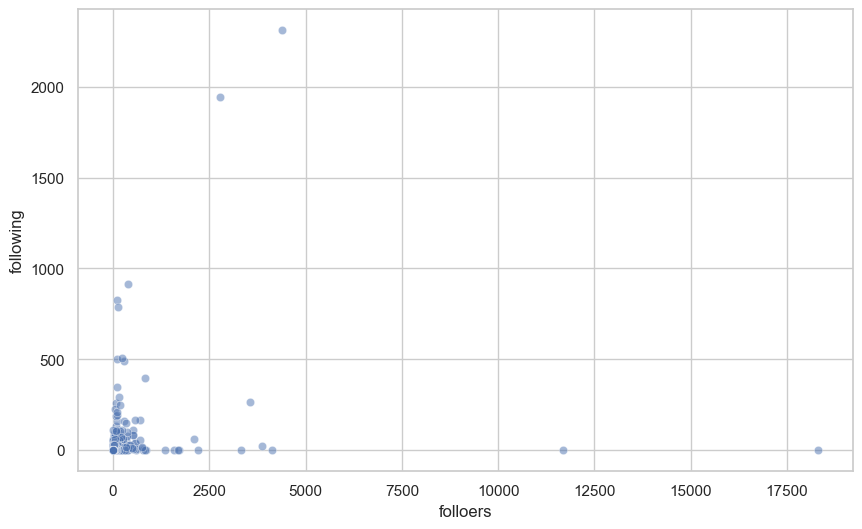

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='followers',y='following',data=bot_df,alpha=0.5)
plt.xlabel('folloers')
plt.ylabel('following')
plt.show()

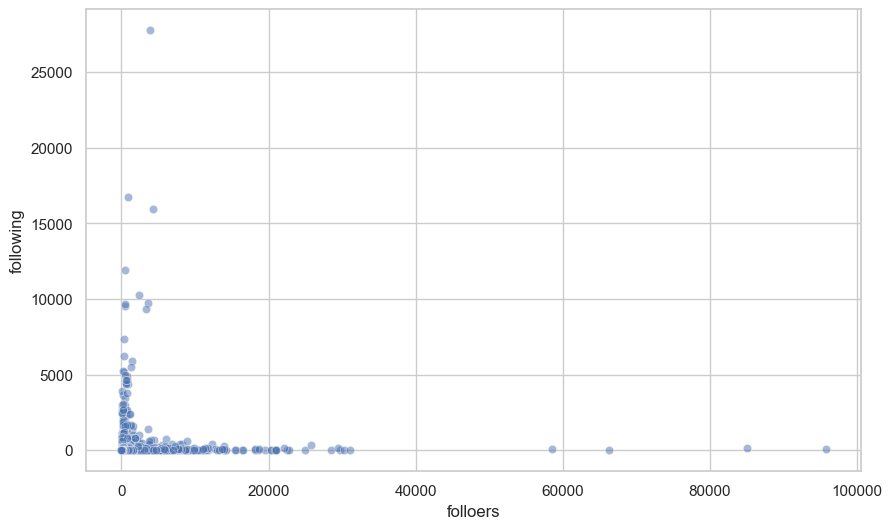

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='followers',y='following',data=human_df,alpha=0.5)
plt.xlabel('folloers')
plt.ylabel('following')
plt.show()

4.1用饼图看分布比例
4.2用线柱看趋势
4.3同4.2
4.4看位置，followers和following的相对位置用点图
4.5同4.4